In [1]:
import glob
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
colors = sns.color_palette("tab10")

In [2]:
p_dict = {
    1: 0.15967,
    2: 0.32865,
    3: 0.416,
    4: 0.458,
    5: 0.4792
}
h0 = np.sqrt(3) / 2 / np.pi
nu = 4 / 3

In [3]:
def load_data(L_focus):
    x_data_list = [np.array([])] * 5
    y_data_list = [np.array([])] * 5

    for f in glob.glob("data/*_entropies_all.npy"):
        fn = f[5:].split("_")[:-2]
        L = int(fn[0])
        if L != L_focus:
            continue
        # depth = int(fn[1])
        # shots = int(fn[2])
        p = float(fn[3])
        M = int(fn[4])
        D = 2 ** M
        if p != p_dict[M]:
            continue
        xi = D ** nu

        print(f)
        data = np.load(f)[-2, :]

        for i in range(1, L // 2 + 1):
            x_data_list[M - 1] = np.append(x_data_list[M - 1], i / xi)
            y_data_list[M - 1] = np.append(y_data_list[M - 1], data[i-1] - h0 * nu * (np.log(D))**2)
    
    return x_data_list, y_data_list

In [4]:
def make_plot(L_focus):
    plt.subplots(figsize = (8, 6), layout = "constrained")

    x_data_list, y_data_list = load_data(L_focus)

    filename = "figs/{}_crossover.png".format(L_focus)

    for i in range(5):
        plt.scatter(x_data_list[i], y_data_list[i], marker = ".", color = colors[i], label = "$D={}$".format(2**(i+1)))

    plt.xlabel(r"$L/\xi_*$")
    plt.ylabel(r"$S(L,p=p_c,D)-h_0\nu_*(\ln{D})^2$")
    plt.title("Crossover Scaling, system size {}".format(L_focus))
    plt.legend()
    plt.minorticks_on()
    plt.xscale("log")
    plt.savefig(filename, dpi = 300)
    plt.show()

data\16_8_32768_0.458_4_entropies_all.npy
data\16_8_4096_0.15967_1_entropies_all.npy
data\16_8_4096_0.32865_2_entropies_all.npy
data\16_8_4096_0.416_3_entropies_all.npy
data\16_8_4096_0.458_4_entropies_all.npy
data\16_8_4096_0.4792_5_entropies_all.npy


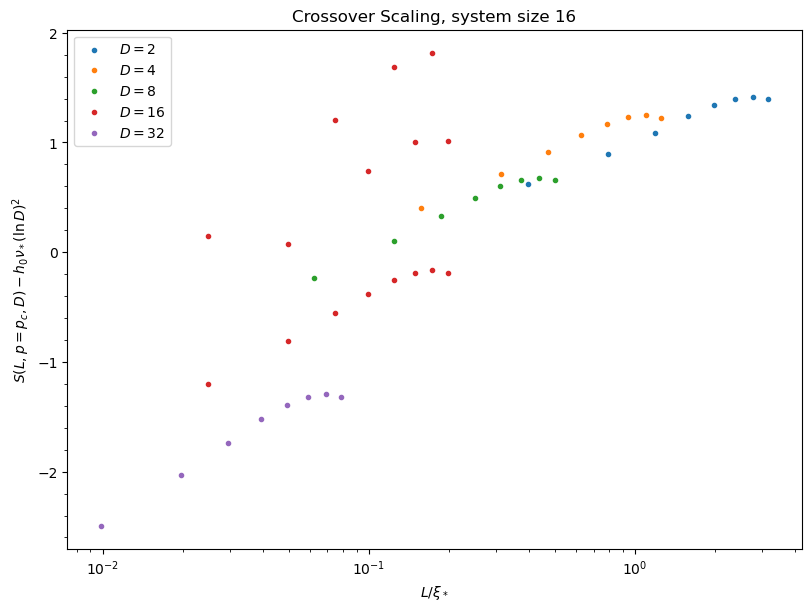

data\32_16_32768_0.458_4_entropies_all.npy
data\32_16_4096_0.15967_1_entropies_all.npy
data\32_16_4096_0.32865_2_entropies_all.npy
data\32_16_4096_0.416_3_entropies_all.npy
data\32_16_4096_0.458_4_entropies_all.npy
data\32_16_4096_0.4792_5_entropies_all.npy


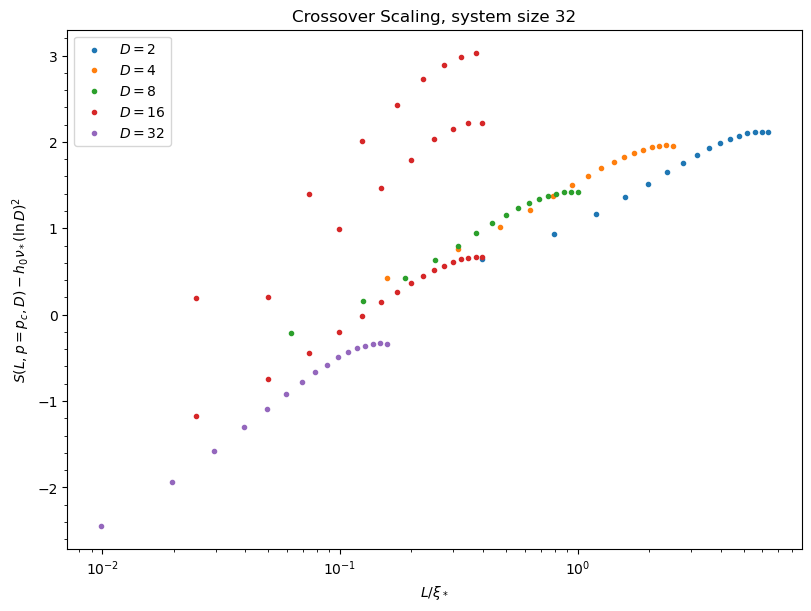

data\64_32_32768_0.458_4_entropies_all.npy
data\64_32_4096_0.15967_1_entropies_all.npy
data\64_32_4096_0.32865_2_entropies_all.npy
data\64_32_4096_0.416_3_entropies_all.npy
data\64_32_4096_0.458_4_entropies_all.npy
data\64_32_4096_0.4792_5_entropies_all.npy


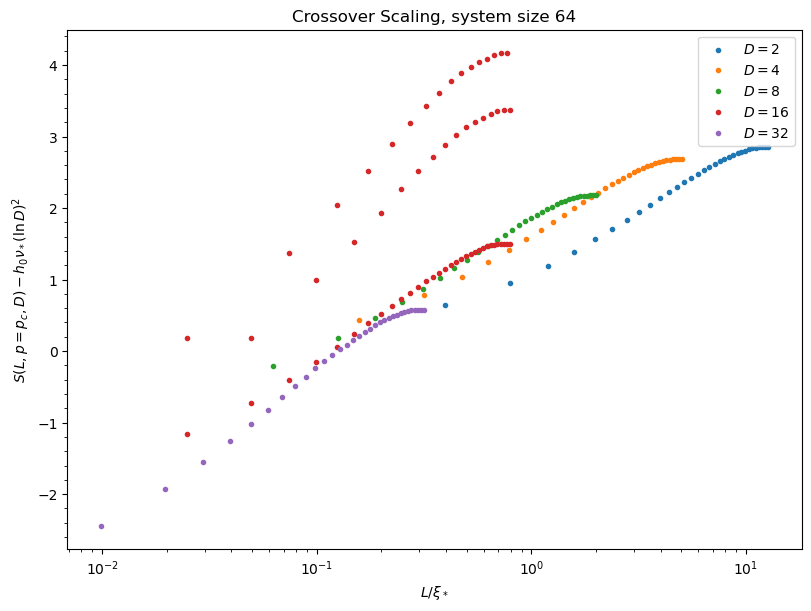

data\128_64_32768_0.458_4_entropies_all.npy
data\128_64_4096_0.15967_1_entropies_all.npy
data\128_64_4096_0.32865_2_entropies_all.npy
data\128_64_4096_0.416_3_entropies_all.npy
data\128_64_4096_0.458_4_entropies_all.npy
data\128_64_4096_0.4792_5_entropies_all.npy


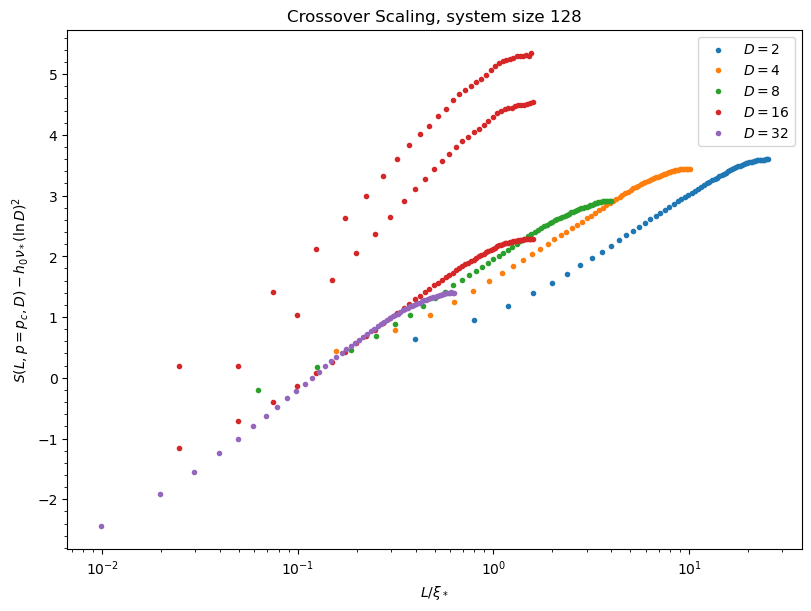

data\256_128_32768_0.458_4_entropies_all.npy
data\256_128_4096_0.15967_1_entropies_all.npy
data\256_128_4096_0.32865_2_entropies_all.npy
data\256_128_4096_0.416_3_entropies_all.npy
data\256_128_4096_0.458_4_entropies_all.npy
data\256_128_4096_0.4792_5_entropies_all.npy


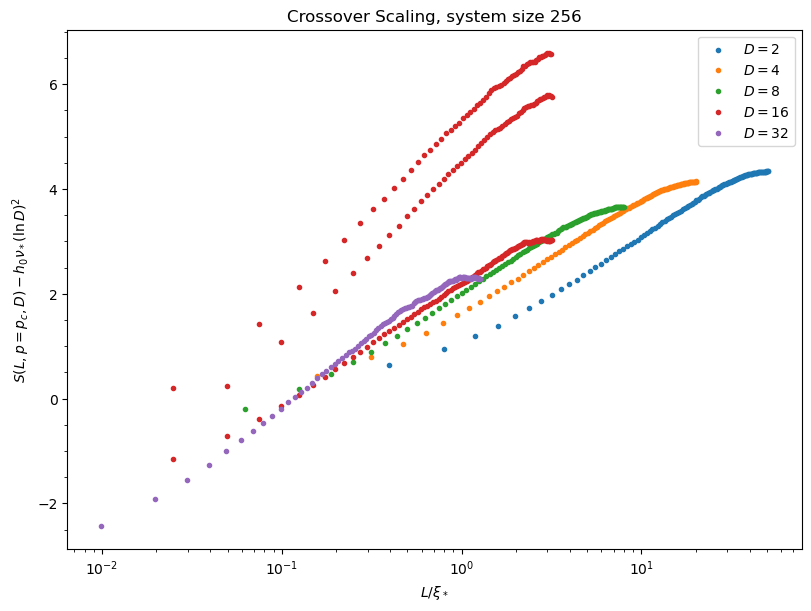

data\512_256_4096_0.15967_1_entropies_all.npy
data\512_256_4096_0.32865_2_entropies_all.npy


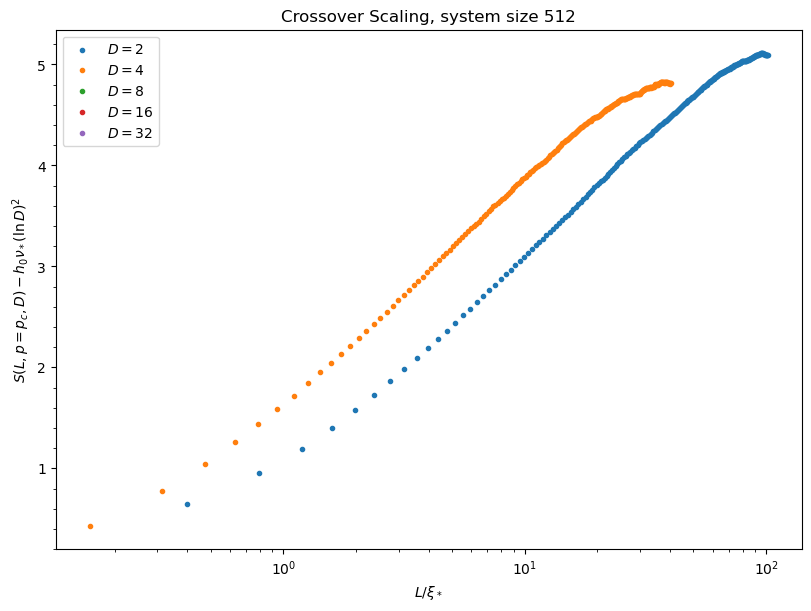

In [5]:
for L_focus in [16, 32, 64, 128, 256, 512]:
    make_plot(L_focus)